In [36]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd "/content/gdrive/MyDrive/AI-Thinking-Data"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/.shortcut-targets-by-id/1EH1SqwJ8QqFAhAXhp4Xs80aQOOfssre8/AI-Thinking-Data


In [61]:
!pip install matplotlib
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconf

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc

%matplotlib inline

plt.rc('font', family='NanumGothic')


In [63]:
df = pd.read_excel("시도별 전출입 인구수.xlsx", engine='openpyxl', header=0, na_values="-")

In [64]:
df = df.fillna(method='ffill')

In [65]:
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

In [66]:
df = pd.read_excel("시도별 전출입 인구수.xlsx", engine='openpyxl', header=0, na_values='-')
df = df.fillna(method='ffill')
mask= (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별': '전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)
sr_one = df_seoul.loc['경기도']

In [67]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


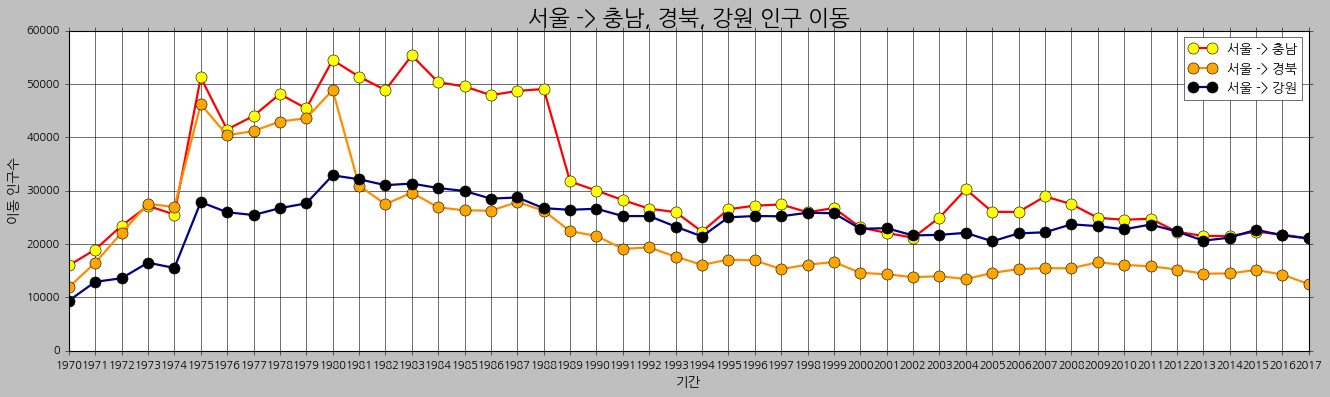

In [73]:

plt.rc('font', family='NanumGothic')
col_years = list(map(str, range(1970, 2018)))
df_3 = df_seoul.loc[['충청남도', '경상북도', '강원도'], col_years]

plt.style.use('grayscale')

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1, 1, 1)

ax.plot(col_years, df_3.loc['충청남도', :], marker='o', markerfacecolor='yellow',
        markersize=10, color='red', linewidth=2, label='서울 -> 충남')
ax.plot(col_years, df_3.loc['경상북도', :], marker='o', markerfacecolor='orange',
        markersize=10, color='darkorange', linewidth=2, label='서울 -> 경북')
ax.plot(col_years, df_3.loc['강원도',:], marker='o', markerfacecolor='black',
        markersize=10, color='darkblue', linewidth=2, label='서울 -> 강원')

ax.legend(loc='best')

ax.set_title('서울 -> 충남, 경북, 강원 인구 이동', size=20)

ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size =12)

plt.show()